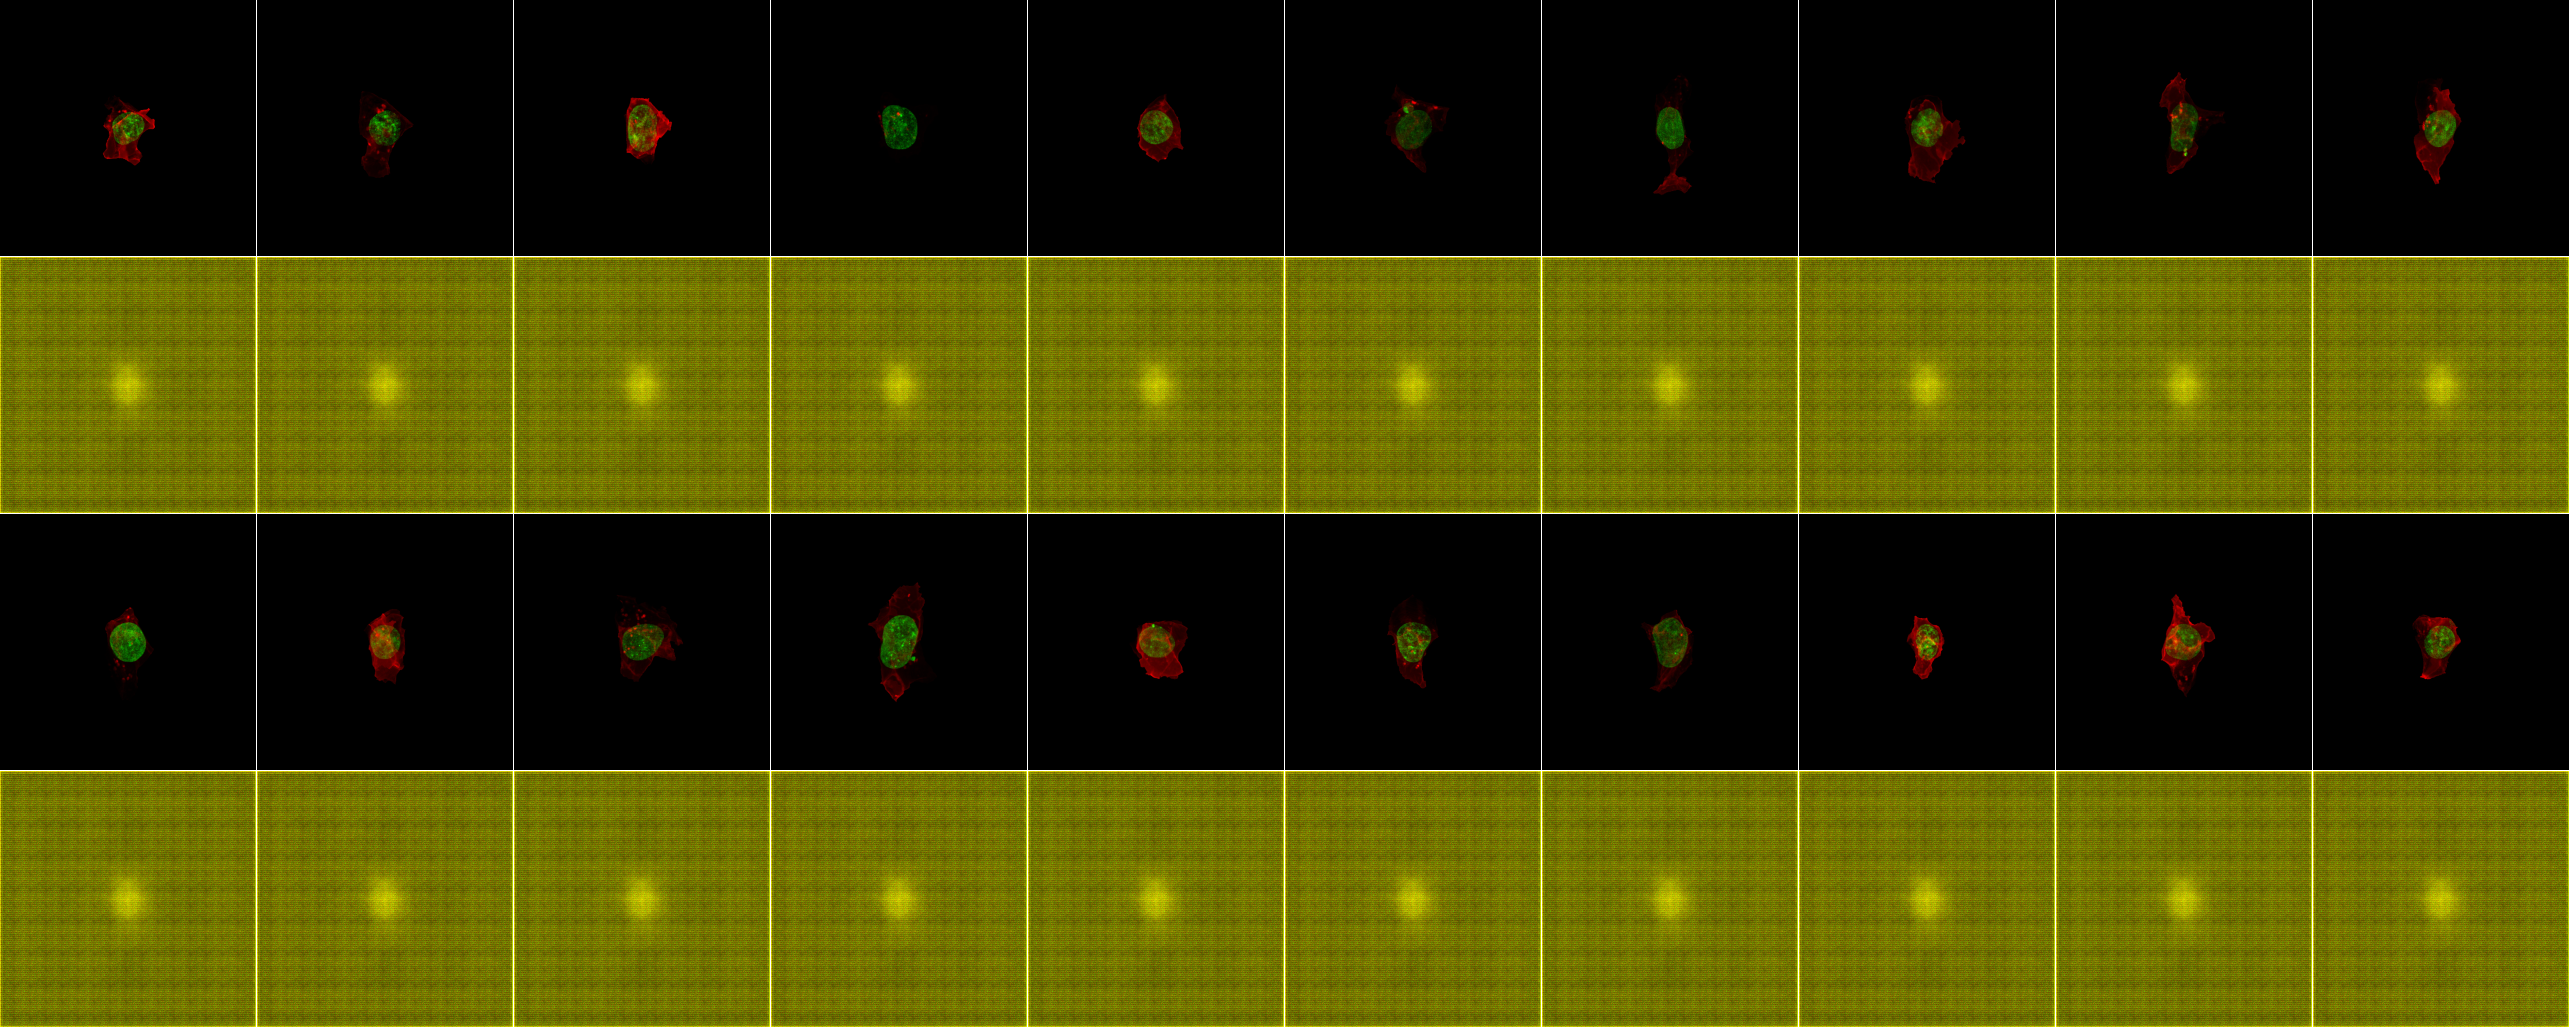

/root/torch/install/share/lua/5.1/image/init.lua:352: ./integrated_cell_2D/test/embedding.png: No such file or directory
stack traceback:
	[C]: in function 'error'
	/root/torch/install/share/lua/5.1/image/init.lua:352: in function 'load'
	[string "Plot = require 'itorch.Plot'..."]:89: in main chunk
	[C]: in function 'xpcall'
	/root/torch/install/share/lua/5.1/itorch/main.lua:210: in function </root/torch/install/share/lua/5.1/itorch/main.lua:174>
	/root/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/root/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/root/torch/install/share/lua/5.1/itorch/main.lua:389: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00405d50: 

In [35]:
Plot = require 'itorch.Plot'
require 'optim'


model_name = './integrated_cell_3D/testv6_test'
model_name = './integrated_cell_3D/testv8_full'

model_name = './integrated_cell_2D/test'


logger_train = torch.load(model_name .. '/tmp_logger_train.t7')
logger_test = torch.load(model_name .. '/tmp_logger_test.t7')

epoch = torch.max(torch.Tensor{logger_train.symbols[logger_train.idx['epoch']]})


im_tmp = image.load(model_name .. '/progress_' .. epoch .. '.png', 3, 'double')
itorch.image(im_tmp)





plot = Plot()

plot:legend(true)

name = 'xHat loss'
y = logger_train.symbols[logger_train.idx[name]]
x = torch.linspace(1, #y, #y)
plot:line(x, y, 'red', name):redraw()

name = 'advEnc loss'
y = logger_train.symbols[logger_train.idx[name]]
x = torch.linspace(1, #y, #y)
plot:line(x, y, 'blue', name):redraw()

name = 'advDec loss'
y = logger_train.symbols[logger_train.idx[name]]
x = torch.linspace(1, #y, #y)
plot:line(x, y, 'green', name):redraw()



embedding_path = model_name .. '/tmp_embeddings.t7'

if paths.filep(embedding_path) then
    require 'gnuplot'
    range = 4
    
    --gnuplot image
    embedding_img_path = model_name .. '/embedding.png'
    embeddings = torch.load(embedding_path)
    
    gnuplot.pngfigure(embedding_img_path)
    
    x1 = torch.squeeze(embeddings.train[{{}, {1}}])
    x2 = torch.squeeze(embeddings.train[{{}, {2}}])
    v1 = {'train', x1, x2, '+'}
--     gnuplot.plot(val)
    
    x1 = torch.squeeze(embeddings.test[{{}, {1}}])
    x2 = torch.squeeze(embeddings.test[{{}, {2}}])
    v2 = {'test', x1, x2, '+'}
    gnuplot.plot({v1, v2})
    
    gnuplot.ylabel('z_1')
    gnuplot.xlabel('z_2')
    gnuplot.axis('equal')
    gnuplot.axis{-range, range, -range, range}

    gnuplot.plotflush()
    
    --inline itorch image
    x1 = torch.squeeze(embeddings.train[{{}, {1}}])
    x2 = torch.squeeze(embeddings.train[{{}, {2}}])
    plot = Plot():circle(x1,  x2, 'red', 'train'):draw()
    plot:legend(true)
    x1 = torch.squeeze(embeddings.test[{{}, {1}}])
    x2 = torch.squeeze(embeddings.test[{{}, {2}}])
    
    plot = plot:circle(x1,  x2, 'blue', 'test'):redraw()
    
    plot:title('Latent Space Embedding'):redraw()
    plot:xaxis('z1'):yaxis('z2'):redraw()

    
    
    im_tmp = image.load(embedding_img_path, 3, 'double')
    itorch.image(im_tmp)
    
    --gnuplot plot
    progress_img_path = model_name .. '/progress_plt.png'
    gnuplot.pngfigure(progress_img_path)

    stat_inds = torch.Tensor({1,4,5})
    stats = {}
    for i = 1,stat_inds:size(1) do
        name, x, y = table.unpack(errors[stat_inds[i]])
        stats[i] = {name, x, y, '~'}
    end
    
    gnuplot.plot(stats)

    gnuplot.ylabel('Loss')
    gnuplot.xlabel('Batch #')
    
    gnuplot.plotflush()
    itorch.image(image.load(progress_img_path, 3, 'double'))
end





In [32]:
torch.max(torch.Tensor{logger_train.symbols[logger_train.idx['epoch']]})

15	


In [27]:
logger_test = torch.load(model_name .. '/tmp_logger_train.t7')
-- print(logger_test)

logger_train = torch.load(model_name .. '/tmp_logger_test.t7')
-- print(logger_train)

print(#logger_train.symbols[3])
print(#logger_test.symbols[3])

1	
15	


In [77]:
print(#y)
print(x:size())

60	
 63
[torch.LongStorage of size 1]



In [80]:
print(y)

{
  1 : 0.71733185648918
  2 : 0.87625688314438
  3 : 0.7748074233532
  4 : 0.78946540753047
  5 : 0.80070695281029
  6 : 0.71196398139
  7 : 0.71177470684052
  8 : 0.74148190021515
  9 : 0.66629734635353
  10 : 0.69127848744392
  11 : 0.67777013778687
  12 : 0.67844863732656
  13 : 0.67285013198853
  14 : 0.67392656207085
  15 : 0.65479809045792
  16 : 0.6671916047732
  17 : 0.64119523763657
  18 : 0.64896899461746
  19 : 0.65683323144913
  20 : 0.64899915456772
  21 : 0.64172434806824
  22 : 0.65398299694061
  23 : 0.62543949484825
  24 : 0.64038228988647
  25 : 0.63023263216019
  26 : 0.65049204230309
  27 : 0.63040286302567
  28 : 0.63704252243042
  29 : 0.62637186050415
  30 : 0.62699010968208
  31 : 0.62283676862717
  32 : 0.62539956967036
  33 : 0.61088952422142
  34 : 0.60358875989914
  35 : 0.60663986206055
  36 : 0.60703939199448
  37 : 0.60743176937103
  38 : 0.62395602464676
  39 : 0.65827509760857
  40 : 0.62988764047623
  41 : 0.64041587710381
  42 : 0.61414265632629
  43


  50 : 0.58870995044708
  51 : 0.59014084935188
  52 : 0.58604923884074
  53 : 0.63602355122566
  54 : 0.67963179945946
  55 : 0.62704610824585
  56 : 0.64756715297699
  57 : 0.6365020275116
  58 : 0.63362383842468
  59 : 0.58824557065964
  60 : 0.61945714553197
}
